#### Lesson 3: Intermediate Visualization

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

##### Drills

Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

    1. Choose one variable and plot that variable four different ways.
    2. Choose two continuous variables, and plot them three different ways.
    3. Choose one continuous variable and one categorical variable, and plot them six different ways.

In [3]:
# taken from Kaggle superheros datasets
data = pd.read_csv('Data/charcters_stats.csv')

In [4]:
data.head()

Name Alignment  Intelligence  Strength  Speed  Durability  Power  \
0      3-D Man      good            50        31     43          32     25   
1       A-Bomb      good            38       100     17          80     17   
2   Abe Sapien      good            88        14     35          42     35   
3     Abin Sur      good            50        90     53          64     84   
4  Abomination       bad            63        80     53          90     55   

   Combat  Total  
0      52    233  
1      64    316  
2      85    299  
3      65    406  
4      95    436

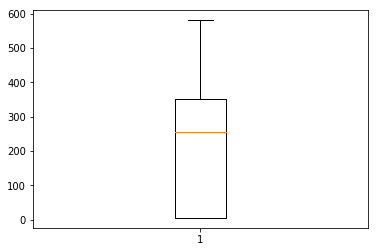

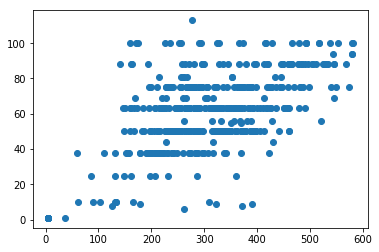

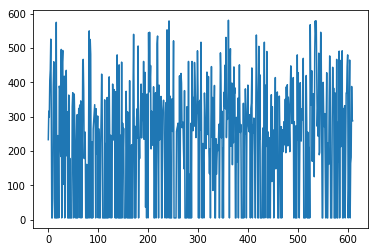

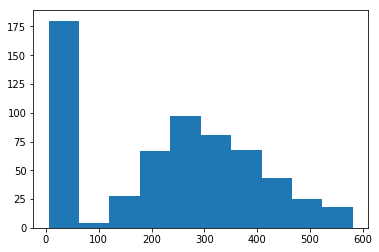

In [5]:
#1. Choose one variable and plot that variable four different ways
plt.boxplot(data['Total'])
plt.show()

plt.scatter(data['Total'], data['Intelligence'])
plt.show()

plt.plot(data['Total'])
plt.show()

plt.hist(data['Total'])
plt.show()

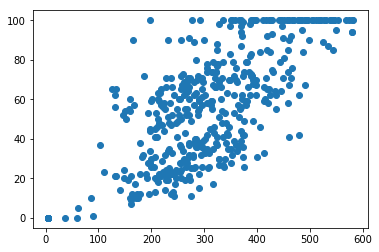

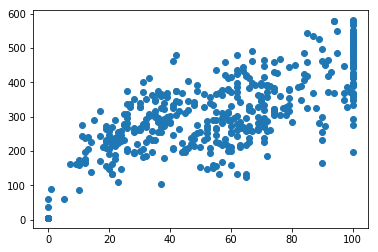

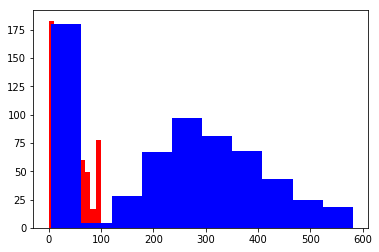

In [6]:
#2. Choose two continuous variables, and plot them three different ways.
plt.scatter(data['Total'], data['Power'])
plt.show()

plt.scatter(data['Power'], data['Total'])
plt.show()

plt.hist(data['Power'], color='red')
plt.hist(data['Total'], color='blue')
plt.show()

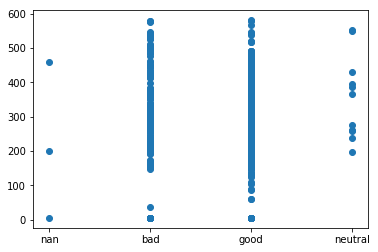

In [12]:
#3. Choose one continuous variable and one categorical variable, and plot them six different ways.
plt.scatter(data['Alignment'], data['Total'])
plt.show()

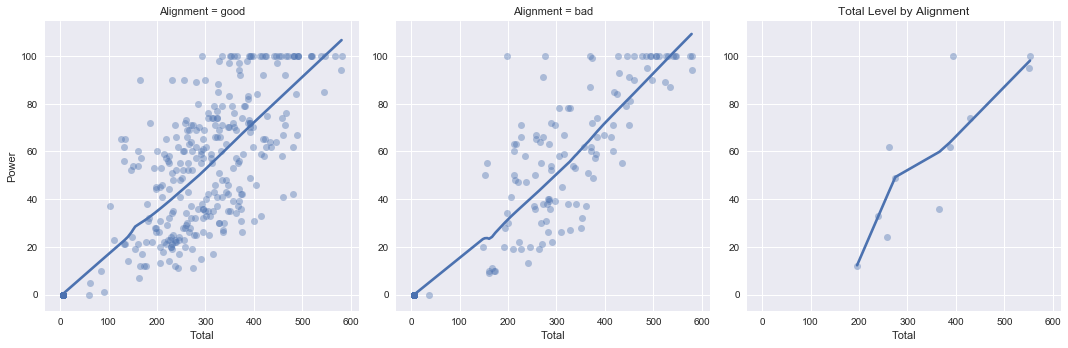

In [27]:
g = sns.lmplot(y='Power', 
               x='Total',
               data=data,
               col='Alignment',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Power")
g.set_xlabels("Total")
plt.title('Total Level by Alignment')
plt.show()

In [8]:
# breaking down dataset by Alignment
good = data[data['Alignment']=='good']
bad = data[data['Alignment']=='bad']
neutral = data[data['Alignment']=='neutral']

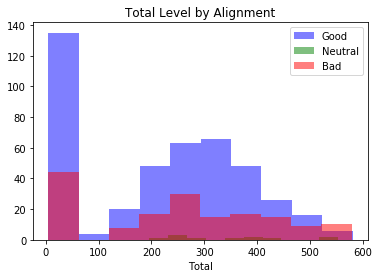

In [11]:
plt.hist(good['Total'], color='blue', alpha=.5,label='Good')
plt.hist(neutral['Total'], color='green', alpha=.5,label='Neutral')  
plt.hist(bad['Total'], color='red', alpha=.5,label='Bad')
plt.xlabel('Total')
plt.legend(loc='upper right')
plt.title('Total Level by Alignment')
plt.show()

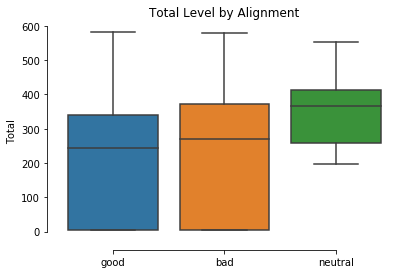

In [14]:
ax = sns.boxplot(x='Alignment',y='Total',data=data)  
plt.title('Total Level by Alignment')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Total')

plt.show()

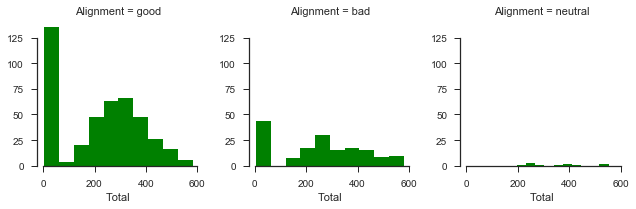

In [17]:
sns.set(style="ticks")
g = sns.FacetGrid(data, col="Alignment")
plt.title('Total Level by Alignment')
g.map(plt.hist, "Total", color="green",  lw=0)
plt.subplots_adjust(top=0.9)
g.set_axis_labels('Total')
sns.despine(trim=True)
plt.show()

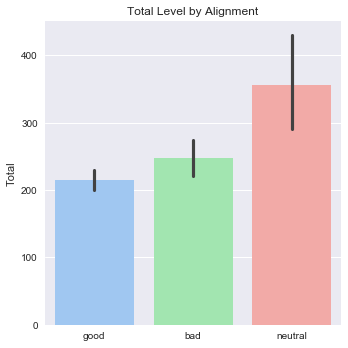

In [25]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Alignment", y="Total",  data=data,
                   size=5, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Total")
g.set_xlabels("")
plt.title('Total Level by Alignment')
plt.show()

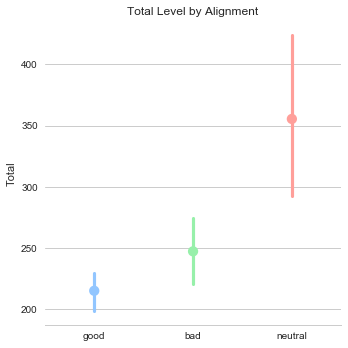

In [23]:
sns.set(style="whitegrid")

g = sns.factorplot(x="Alignment", y="Total",  data=data,
                   size=5, kind="point", palette="pastel", ci=95, dodge=True, join=False)
g.despine(left=True)
g.set_ylabels("Total")
g.set_xlabels("")
plt.title('Total Level by Alignment')
plt.show()

#### Challenge: Data cleaning & validation

Determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal .

In [10]:
wellcome_data = pd.read_csv('Data/WELLCOME_APCspend2013_forThinkful.csv', engine='python')

In [11]:
wellcome_data.head()

PMID/PMCID Publisher           Journal title  \
0                    NaN       CUP  Psychological Medicine   
1             PMC3679557       ACS       Biomacromolecules   
2  23043264  PMC3506128        ACS              J Med Chem   
3    23438330 PMC3646402       ACS              J Med Chem   
4   23438216 PMC3601604        ACS              J Org Chem   

                                       Article title  \
0  Reduced parahippocampal cortical thickness in ...   
1  Structural characterization of a Model Gram-ne...   
2  Fumaroylamino-4,5-epoxymorphinans and related ...   
3  Orvinols with mixed kappa/mu opioid receptor a...   
4  Regioselective opening of myo-inositol orthoes...   

  COST (£) charged to Wellcome (inc VAT when charged)  
0                                              £0.00   
1                                           £2381.04   
2                                            £642.56   
3                                            £669.64   
4                                            £685.88

In [16]:
wellcome_data['Journal title'].value_counts()

PLoS One                                                   92
PLoS ONE                                                   62
Journal of Biological Chemistry                            48
Nucleic Acids Research                                     21
Proceedings of the National Academy of Sciences            19
PLoS Neglected Tropical Diseases                           18
Human Molecular Genetics                                   18
Nature Communications                                      17
PLoS Genetics                                              15
PLoS Pathogens                                             15
Neuroimage                                                 15
Brain                                                      14
NeuroImage                                                 14
BMC Public Health                                          14
PLOS ONE                                                   14
Movement Disorders                                         13
Journal 

In [18]:
# putting the journal titles in lowercase letters
wellcome_data['Journal title'] = wellcome_data['Journal title'].str.lower()

In [19]:
wellcome_data['Journal title'].value_counts()

plos one                                                                                                                        190
journal of biological chemistry                                                                                                  53
neuroimage                                                                                                                       29
plos pathogens                                                                                                                   24
plos genetics                                                                                                                    24
nucleic acids research                                                                                                           23
proceedings of the national academy of sciences                                                                                  20
plos neglected tropical diseases                                            

In [20]:
wellcome_data.head()

PMID/PMCID Publisher           Journal title  \
0                    NaN       CUP  psychological medicine   
1             PMC3679557       ACS       biomacromolecules   
2  23043264  PMC3506128        ACS              j med chem   
3    23438330 PMC3646402       ACS              j med chem   
4   23438216 PMC3601604        ACS              j org chem   

                                       Article title  \
0  Reduced parahippocampal cortical thickness in ...   
1  Structural characterization of a Model Gram-ne...   
2  Fumaroylamino-4,5-epoxymorphinans and related ...   
3  Orvinols with mixed kappa/mu opioid receptor a...   
4  Regioselective opening of myo-inositol orthoes...   

  COST (£) charged to Wellcome (inc VAT when charged)  
0                                              £0.00   
1                                           £2381.04   
2                                            £642.56   
3                                            £669.64   
4                                            £685.88

In [23]:
def make_string(x):
    return str(x).isdigit()

In [24]:
make_string(wellcome_data['COST (£) charged to Wellcome (inc VAT when charged)'])

False

In [25]:
wellcome_data['COST (£) charged to Wellcome (inc VAT when charged)']

'£0.00'

In [28]:
wellcome_data['COST (£) charged to Wellcome (inc VAT when charged)'] = wellcome_data['COST (£) charged to Wellcome (inc VAT when charged)'].str.replace('£', '')

In [30]:
str(wellcome_data['COST (£) charged to Wellcome (inc VAT when charged)']).isdigit()

False

In [31]:
wellcome_data['COST (£) charged to Wellcome (inc VAT when charged)'].dtype(int)

TypeError: 'numpy.dtype' object is not callable

In [32]:
wellcome_data.head()

PMID/PMCID Publisher           Journal title  \
0                    NaN       CUP  psychological medicine   
1             PMC3679557       ACS       biomacromolecules   
2  23043264  PMC3506128        ACS              j med chem   
3    23438330 PMC3646402       ACS              j med chem   
4   23438216 PMC3601604        ACS              j org chem   

                                       Article title  \
0  Reduced parahippocampal cortical thickness in ...   
1  Structural characterization of a Model Gram-ne...   
2  Fumaroylamino-4,5-epoxymorphinans and related ...   
3  Orvinols with mixed kappa/mu opioid receptor a...   
4  Regioselective opening of myo-inositol orthoes...   

  COST (£) charged to Wellcome (inc VAT when charged)  
0                                               0.00   
1                                            2381.04   
2                                             642.56   
3                                             669.64   
4                                             685.88

In [33]:
wellcome_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [44]:
wellcome_data.nunique()

PMID/PMCID                                             1880
Publisher                                               299
Journal title                                           928
Article title                                          2126
COST (£) charged to Wellcome (inc VAT when charged)    1402
dtype: int64